# 1. Import and Install Dependencies

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [36]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [39]:
cap = cv2.VideoCapture("DAYS.mp4")
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [40]:
len(results.left_hand_landmarks.landmark)

21

In [41]:
results

mediapipe.python.solution_base.SolutionOutputs

In [42]:
draw_landmarks(frame, results)

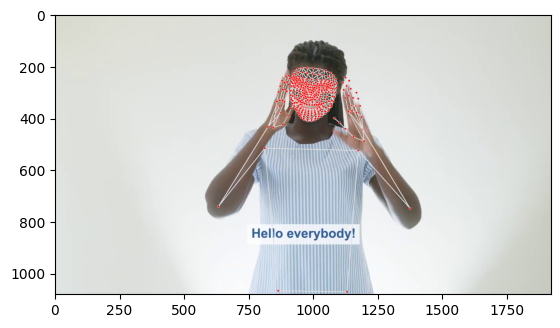

In [43]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [44]:
len(results.left_hand_landmarks.landmark)

21

In [45]:
len(results.right_hand_landmarks.landmark)

21

In [46]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [48]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [49]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [50]:
result_test = extract_keypoints(results)

In [53]:
result_test

array([ 0.51435846,  0.29812801, -0.46611583, ...,  0.45715466,
        0.23832712, -0.01297483])

In [17]:
468*3+33*4+21*3+21*3

1662

In [20]:
np.save('test', result_test)

In [21]:
np.load('test.npy')

array([ 0.49728489,  0.25772774, -0.60955197, ...,  0.53526604,
        0.52075112, -0.02353533])

# 4. Setup Folders for Collection

In [22]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_DATA') 

# Scan the data folder to collect unique action labels
actions = set()
for filename in os.listdir(DATA_PATH):
    if filename.endswith('.mp4'):
        action = filename.split('.')[0]  # Extract the action label from the filename
        actions.add(action)

# Convert the set of unique action labels to a NumPy array
actions = np.array(list(actions))

# 1 video worth of data
no_sequences = 1

# Videos are going to be 30 frames in length
#sequence_length = 30


print("Actions Detected:")
print(actions)

Actions Detected:
['follows' 'our' 'regions' 'family' 'ugandan' 'diferrent' 'other'
 'sign language' 'and' 'as follows' 'parents' 'users' 'ways' 'hello'
 'topic' 'have' 'guardians' 'is' 'children' 'start' 'now' 'numbers' 'here'
 'members' 'but']


In [23]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [54]:
import os
import cv2
import numpy as np
import mediapipe as mp

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_DATA')

# Path to the folder containing video files
video_folder = 'MP_DATA'

# Get a list of all video file paths
video_paths = [os.path.join(video_folder, f) for f in os.listdir(video_folder) if f.endswith('.mp4')]

# Set mediapipe model
mp_holistic = mp.solutions.holistic

# Videos are going to be 30 frames in length
sequence_length = 30

for video_path in video_paths:
    # Get the action label from the video file name
    action = os.path.basename(video_path).split('.')[0]

    # Initialize the video capture object
    cap = cv2.VideoCapture(video_path)

    # Check if the video capture was successful
    if not cap.isOpened():
        print(f"Error: Failed to open the video file {video_path}")
        continue

    # Set mediapipe model
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        # Create folder for action if it doesn't exist
        action_folder = os.path.join(DATA_PATH, action)
        if not os.path.exists(action_folder):
            os.makedirs(action_folder)

        # Get the next available sequence folder name
        sequence_id = 0
        sequence_folder = os.path.join(action_folder, str(sequence_id))
        while os.path.exists(sequence_folder):
            sequence_id += 1
            sequence_folder = os.path.join(action_folder, str(sequence_id))

        # Create the new sequence folder
        os.makedirs(sequence_folder)

        # Check if all NumPy files already exist in the sequence folder
        existing_files = [f for f in os.listdir(sequence_folder) if f.endswith('.npy')]
        if len(existing_files) == sequence_length:
            print(f"Extraction already done for {action}. Skipping...")
            continue

        # Loop through video length aka sequence length
        for frame_num in range(sequence_length):
            # Read feed
            ret, frame = cap.read()

            # Check if the frame is empty
            if not ret:
                print(f"Error: Failed to read frame from the video capture {video_path}")
                break

            # Make detections
            image, results = mediapipe_detection(frame, holistic)

            # Draw landmarks
            draw_styled_landmarks(image, results)

            # Apply wait logic
            if frame_num == 0:
                cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence_id), (15, 12),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                # Show to screen
                cv2.imshow('OpenCV Feed', image)
                cv2.waitKey(500)
            else:
                cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence_id), (15, 12),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                # Show to screen
                cv2.imshow('OpenCV Feed', image)

            # Export keypoints
            keypoints = extract_keypoints(results)
            npy_path = os.path.join(sequence_folder, str(frame_num))
            np.save(npy_path, keypoints)

            # Break gracefully
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

    # Release video capture
    cap.release()

# Close OpenCV windows
cv2.destroyAllWindows()

Error: Failed to read frame from the video capture MP_DATA\and.mp4
Error: Failed to read frame from the video capture MP_DATA\but.mp4
Error: Failed to read frame from the video capture MP_DATA\family.mp4
Error: Failed to read frame from the video capture MP_DATA\have.mp4
Error: Failed to read frame from the video capture MP_DATA\hello.mp4
Error: Failed to read frame from the video capture MP_DATA\here.mp4
Error: Failed to read frame from the video capture MP_DATA\is.mp4
Error: Failed to read frame from the video capture MP_DATA\other.mp4
Error: Failed to read frame from the video capture MP_DATA\our.mp4
Error: Failed to read frame from the video capture MP_DATA\start.mp4
Error: Failed to read frame from the video capture MP_DATA\ways.mp4


In [55]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [56]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [57]:
label_map = {label:num for num, label in enumerate(actions)}

In [58]:
label_map

{'and': 0,
 'as follows': 1,
 'but': 2,
 'children': 3,
 'diferrent': 4,
 'family': 5,
 'follows': 6,
 'guardians': 7,
 'have': 8,
 'hello': 9,
 'here': 10,
 'is': 11,
 'members': 12,
 'now': 13,
 'numbers': 14,
 'other': 15,
 'our': 16,
 'parents': 17,
 'regions': 18,
 'sign language': 19,
 'start': 20,
 'topic': 21,
 'ugandan': 22,
 'users': 23,
 'ways': 24}

In [60]:
import os
import numpy as np

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_DATA')

# Actions (labels) in the dataset
potential_actions = os.listdir(DATA_PATH)
actions = [action for action in potential_actions if os.path.isdir(os.path.join(DATA_PATH, action))]

# Dictionary to map action names to label indices
label_map = {action: idx for idx, action in enumerate(actions)}

sequences, labels = [], []

for action in actions:
    action_folder = os.path.join(DATA_PATH, action)
    sequence_folders = [os.path.join(action_folder, f) for f in os.listdir(action_folder) if os.path.isdir(os.path.join(action_folder, f))]
    sequence_folders = sorted(sequence_folders)

    for sequence_folder in sequence_folders:
        sequence = []
        frame_files = sorted([f for f in os.listdir(sequence_folder) if f.endswith('.npy') and not f.startswith('._')])
        sequence_length = len(frame_files)

        for frame_num in range(sequence_length):
            npy_path = os.path.join(sequence_folder, frame_files[frame_num])
            try:
                res = np.load(npy_path)
                sequence.append(res)
            except EOFError:
                print(f"Warning: Skipping empty or corrupted file: {npy_path}")
                continue

        sequences.append(sequence)
        labels.append(label_map[action])

In [62]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences

# Get the length of the longest sequence
max_sequence_length = max(len(seq) for seq in sequences)

# Pad the sequences
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Convert the padded sequences to a NumPy array
sequences_array = np.array(padded_sequences)

In [63]:
np.array(labels).shape

(500,)

In [64]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences

# Get the length of the longest sequence
max_sequence_length = max(len(seq) for seq in sequences)

# Pad the sequences
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Convert the padded sequences to a NumPy array
X = np.array(padded_sequences)

In [65]:
X.shape

(500, 52, 1662)

In [66]:
y = to_categorical(labels).astype(int)

In [67]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [69]:
y_test.shape

(25, 25)

# 7. Build and Train LSTM Neural Network

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [71]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [72]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()

# Increase the number of LSTM units and add dropout regularization
model.add(LSTM(128, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(Dropout(0.2))  # Add dropout regularization

# Add an additional LSTM layer with more units and dropout
model.add(LSTM(256, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))

# Keep the existing LSTM layer
model.add(LSTM(64, return_sequences=False, activation='relu'))

# Increase the number of units in the Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))  # Add dropout regularization
model.add(Dense(64, activation='relu'))

# Output layer with the number of classes
model.add(Dense(len(actions), activation='softmax'))

In [73]:
res = [.7, 0.2, 0.1]

In [74]:
actions[np.argmax(res)]

'and'

In [75]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [78]:
model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback])

Epoch 1/100


ValueError: in user code:

    File "c:\Users\STAR PC 1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\STAR PC 1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\STAR PC 1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\STAR PC 1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\STAR PC 1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\STAR PC 1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 30, 1662), found shape=(None, 52, 1662)


In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 128)           916992    
                                                                 
 dropout (Dropout)           (None, 30, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 256)           394240    
                                                                 
 dropout_1 (Dropout)         (None, 30, 256)           0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

# 8. Make Predictions

In [51]:
res = model.predict(X_test)

2/2 [==============================] - 1s 19ms/step


In [54]:
actions[np.argmax(res[8])]

'members'

In [55]:
actions[np.argmax(y_test[8])]

'members'

# 9. Save Weights

In [49]:
model.save('ugsign.h5')

c:\Users\STAR PC 1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [217]:
del model

In [50]:
model.load_weights('ugsign.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [51]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [52]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 80ms/step


In [53]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [54]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[22,  0],
        [ 1,  0]],

       [[22,  0],
        [ 0,  1]],

       [[19,  0],
        [ 4,  0]],

       [[22,  0],
        [ 0,  1]],

       [[22,  0],
        [ 0,  1]],

       [[21,  0],
        [ 0,  2]],

       [[21,  2],
        [ 0,  0]],

       [[21,  0],
        [ 0,  2]],

       [[22,  0],
        [ 0,  1]],

       [[22,  0],
        [ 1,  0]],

       [[14,  6],
        [ 1,  2]],

       [[21,  0],
        [ 0,  2]],

       [[20,  0],
        [ 0,  3]],

       [[22,  0],
        [ 1,  0]]], dtype=int64)

In [55]:
accuracy_score(ytrue, yhat)

0.6521739130434783

# 11. Test in Real Time

In [56]:
import pyttsx3

In [57]:

# Initialize the text-to-speech engine
audio = pyttsx3.init()

# 1. New detection variables
sequence = []
sentence = []
threshold = 0.4
cap = cv2.VideoCapture("test.mp4")

# Set mediapipe model
mp_holistic = mp.solutions.holistic
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)  # Print the results

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.insert(0, keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predicted_action = actions[np.argmax(res)]
            print(predicted_action)  # Print the predicted action
            audio.say(predicted_action)  # Speak the predicted action
            audio.runAndWait()

        # 3. Viz logic
            if res[np.argmax(res)] > threshold:
                if len(sentence) > 0:
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                    sentence = sentence[-5:]

        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

Exception ignored in: <function BSTR.__del__ at 0x000002687C025CF0>
Traceback (most recent call last):
  File "c:\Users\STAR PC 1\AppData\Local\Programs\Python\Python310\lib\site-packages\comtypes\__init__.py", line 683, in __del__
    def __del__(self, _free=windll.oleaut32.SysFreeString):
KeyboardInterrupt: 


<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 69ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 55ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 54ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 53ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==================

In [67]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.4

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.insert(0,keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1711218068.351404       1 gl_context.cc:344] GL version: 2.1 (2.1 INTEL-20.2.44), renderer: Intel(R) UHD Graphics 617


error: OpenCV(4.9.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
cap.release()
cv2.destroyAllWindows()